# Period poverty research in Bardejov
Before the installation of menstrual lockers

#### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Load data

In [ ]:
pre_data = pd.read_csv('pre_installation_data.csv')
pre_data.head()

,Časová pečiatka,Aký je Váš vek?,Akú školu navštevujete?,Ktorý ročník alebo stupeň vzdelávania aktuálne navštevujete?,S kým aktuálne bývate? (môžete zaškrtnúť viac možností),Ako by ste opísali svoj rodinný stav? (môžete zaškrtnúť viac možností),"Máte deti? Ak áno, koľko?",Počet bratov,Počet sestier,Počet súrodencov,...,Informácie ku gynekologickému problému získané z/od : Mamy,Je pre vás ťažké komunikovať o intímnych témach so svojím lekárom?,Pri hľadaní informácií o zdravotných problémoch dávate prednosť:,Nosievate so sebou zásobu menštruačných pomôcok ako prvú pomoc?,"Je pre vás výmena vložky alebo tampónu stresujúca, ak ste mimo domova?",Cítili ste sa niekedy trápne pri nákupe menštruačných pomôcok?,"Stalo sa vám, že ste si kvôli finančným dôvodom nemohli dovoliť kúpiť menštruačné pomôcky?",Vynechali ste niekedy školu kvôli menštruácii?,"Ako vnímate menštruáciu? Považujete ju za symbol ženskosti, bežný fyziologický jav alebo niečo iné? (napíšte):",Priestor na Vaše pripomienky a komentáre (NEPOVINNÉ):
0,2.4.2025 16:08:38,15,Strednú odbornú školu s maturitou,1,S vlastnou rodinou,Slobodná,NaN,NaN,NaN,NaN,...,1.0,Nie,Diskusným fóram,Len tesne pred očakávanou menštruáciou,Nie,Áno,Nie,Áno,Symbol ženskosti,NaN
1,2.4.2025 16:24:40,17,Strednú odbornú školu s maturitou,1,S rodičmi a/alebo súrodencami,Slobodná,0.0,NaN,NaN,2.0,...,1.0,Nie,Odborným stránkam,Len tesne pred očakávanou menštruáciou,Nie,Nie,Nie,Nie,Symbol ženskosti,NaN
2,2.4.2025 16:34:17,16,Strednú odbornú školu s maturitou,1,S vlastnou rodinou,Slobodná,0.0,NaN,NaN,1.0,...,1.0,Nie,Odborným stránkam,Len tesne pred očakávanou menštruáciou,Nie,Nie,Nie,Nie,Som za to rada,NaN
3,7.4.2025 20:30:44,16,Strednú odbornú školu s maturitou,1,S vlastnou rodinou,Slobodná,0.0,NaN,NaN,2.0,...,0.0,Niekedy,Odborným stránkam,Len tesne pred očakávanou menštruáciou,Áno,Nie,Nie,Áno,Bežný fyziologický jav,NaN
4,7.4.2025 21:25:58,15,Strednú odbornú školu s maturitou,1,S rodičmi a/alebo súrodencami,Slobodná,0.0,NaN,NaN,3.0,...,1.0,Nie,Odborným stránkam,Len tesne pred očakávanou menštruáciou,Niekedy,Áno,Nie,Nie,Symbol ženskosti,"ˇŽiadne. Ženské potreby by mali byť zadarma, m..."


In [4]:
# list all column names
print(pre_data.columns)

Index(['Časová pečiatka', 'Aký je Váš vek?', 'Akú školu navštevujete?',
       'Ktorý ročník alebo stupeň vzdelávania aktuálne navštevujete?',
       'S kým aktuálne bývate? (môžete zaškrtnúť viac možností)',
       'Ako by ste opísali svoj rodinný stav? (môžete zaškrtnúť viac možností)',
       'Máte deti? Ak áno, koľko?', 'Počet bratov', 'Počet sestier',
       'Počet súrodencov',
       'Aké je zamestnanie vášho otca (alebo osoby, ktorá ho nahrádza)?',
       'Aké je najvyššie dosiahnuté vzdelanie alebo posledný ukončený ročník vášho otca?',
       'Aké je zamestnanie vašej mamy (alebo osoby, ktorá ju nahrádza)?',
       'Aké je najvyššie dosiahnuté vzdelanie alebo posledný ukončený ročník vašej mamy?',
       'Máte doma prístup k teplej vode?',
       'Máte doma prístup k sprche alebo vani?',
       'Máte doma prístup k splachovaciemu WC?',
       'Máte doma zabezpečené teplo alebo kúrenie?',
       'Mávate aktuálne menštruáciu?',
       'Koľko rokov ste mali, keď ste dostali prvú 

In [5]:
# drop columns: 'Kde alebo od koho ste získali informácie o menštruácii? (môžete zaškrtnúť viac možností)', 'Aké menštruačné pomôcky ste používali? (môžete zaškrtnúť viac možností)', 'S akými prekážkami ste sa počas menštruácie najčastejšie stretli?', 'Aké pocity alebo emócie najčastejšie pociťujete počas menštruácie? (napíšte):', 'Ak máte podozrenie na gynekologický problém, kde najskôr hľadáte informácie? (napíšte)', 'Priestor na Vaše pripomienky a komentáre (NEPOVINNÉ):' 
pre_data = pre_data.drop(columns=['Kde alebo od koho ste získali informácie o menštruácii? (môžete zaškrtnúť viac možností)', 
                                  'Aké menštruačné pomôcky ste používali? (môžete zaškrtnúť viac možností)', 
                                  'S akými prekážkami ste sa počas menštruácie najčastejšie stretli?', 
                                  'Aké pocity alebo emócie najčastejšie pociťujete počas menštruácie? (napíšte):', 
                                  'Ak máte podozrenie na gynekologický problém, kde najskôr hľadáte informácie? (napíšte)', 
                                  'Priestor na Vaše pripomienky a komentáre (NEPOVINNÉ):'])     
pre_data.columns

Index(['Časová pečiatka', 'Aký je Váš vek?', 'Akú školu navštevujete?',
       'Ktorý ročník alebo stupeň vzdelávania aktuálne navštevujete?',
       'S kým aktuálne bývate? (môžete zaškrtnúť viac možností)',
       'Ako by ste opísali svoj rodinný stav? (môžete zaškrtnúť viac možností)',
       'Máte deti? Ak áno, koľko?', 'Počet bratov', 'Počet sestier',
       'Počet súrodencov',
       'Aké je zamestnanie vášho otca (alebo osoby, ktorá ho nahrádza)?',
       'Aké je najvyššie dosiahnuté vzdelanie alebo posledný ukončený ročník vášho otca?',
       'Aké je zamestnanie vašej mamy (alebo osoby, ktorá ju nahrádza)?',
       'Aké je najvyššie dosiahnuté vzdelanie alebo posledný ukončený ročník vašej mamy?',
       'Máte doma prístup k teplej vode?',
       'Máte doma prístup k sprche alebo vani?',
       'Máte doma prístup k splachovaciemu WC?',
       'Máte doma zabezpečené teplo alebo kúrenie?',
       'Mávate aktuálne menštruáciu?',
       'Koľko rokov ste mali, keď ste dostali prvú 

In [6]:
# change column names
pre_data.columns = ['Timestamp','Vek', 'Škola', 'Ročník', 'S kým aktuálne bývate?', 'Rodinný stav', 'Počet detí', 'Počet bratov', 'Počet sestier', 'Počet súrodencov', 'Zamestnanie otca', 'Najvyššie dosiahnuté vzdelanie alebo posledný ukončený ročník otca', 'Zamestnanie matky', 'Najvyššie dosiahnuté vzdelanie alebo posledný ukončený ročník matky', 
                    'Prístup k teplej vode', 'Prístup k sprche alebo vani', 'Prístup k splachovaciemu WC', 'Prístup ku teplu alebo kúreniu',
                    'Mávate aktuálne menštruáciu', 'Vek prvej menštruácie', 'Mali ste pred prvou menštruáciou dostatok informácií o tom, čo menštruácia znamená a ako sa na ňu pripraviť?',
                    'Informácie o menštruácií získané od iného rodinného príslušníka', 'Informácie o menštruácií získané zo školy', 'Informácie o menštruácií získané od sestry/sestier', 'Informácie o menštruácií získané z prednášok/workshopov', 'Informácie o menštruácií získané od kamarátov', 'Informácie o menštruácií získané z internetu', 'Informácie o menštruácií získané od matky',
                    'Používané potreby: Handry','Používané potreby: Menštruačné nohavičky','Používané porteby: Intímky','Používané porteby: Tampóny','Používané potreby: Menštruačné vložky',
                    'Dostatok pomôcok na celé trvanie menštruácie', 'Prekážka: peniaze', 'Prekážka: žiadne', 'Prekážka: bolesť',
                    'Sledujete svoj menštruačný cyklus?','Akým spôsobom si zaznamenávate svoj cyklus?', 'Vnímate menštruáciu ako zásah do svojich každodenných plánov?',
                    'Pocity: smútok / depresia / úzkosť / strach', 'Pocity: hnev / nervozita / náladovosť / stres', 'Pocity: únava', 'Pocity: bolesť',
                    'Informácie ku gynekologickému problému získané z/od : Lekára', 'Informácie ku gynekologickému problému získané z/od : Kamarátov', 'Informácie ku gynekologickému problému získané z/od : Internetu', 'Informácie ku gynekologickému problému získané z/od : Mamy',
                    'Je pre vás ťažké komunikovať o intímnych témach so svojím lekárom?', 'Pri hľadaní informácií o zdravotných problémoch dávate prednosť:', 'Nosievate so sebou zásobu menštruačných pomôcok ako prvú pomoc?',
                    'Je pre vás výmena vložky alebo tampónu stresujúca, ak ste mimo domova?', 'Cítili ste sa niekedy trápne pri nákupe menštruačných pomôcok?', 'Stalo sa vám, že ste si kvôli finančným dôvodom nemohli dovoliť kúpiť menštruačné pomôcky?',
                    'Vynechali ste niekedy školu kvôli menštruácii?', 'Ako vnímate menštruáciu?']

## Statistics

In [7]:
# number of responders
num_responders = pre_data.shape[0]
print(f"The number of responders is: {num_responders}")

The number of responders is: 133


In [8]:
# age of responders
avg_age = pre_data['Vek'].mean().__round__(2)
min_age = pre_data['Vek'].min()
max_age = pre_data['Vek'].max()
print(f"The average age of responders is: {avg_age}")
print(f"The minimum age of responders is: {min_age}")
print(f"The maximum age of responders is: {max_age}")

The average age of responders is: 16.24
The minimum age of responders is: 12
The maximum age of responders is: 19


In [9]:
# AVG age of first period
avg_first_period_age = pre_data['Vek prvej menštruácie'].mean().__round__(2)
min_first_period_age = pre_data['Vek prvej menštruácie'].min()
max_first_period_age = pre_data['Vek prvej menštruácie'].max()
print(f"The minimum age of first period is: {min_first_period_age}")
print(f"The maximum age of first period is: {max_first_period_age}")
print(f"The average age of first period is: {avg_first_period_age}")

The minimum age of first period is: 9.0
The maximum age of first period is: 15.0
The average age of first period is: 12.1


In [10]:
# AVG number of siblings
avg_siblings = pre_data['Počet súrodencov'].mean().__round__(2)
print(f"The average number of siblings is: {avg_siblings}")

# AVG number of brothers
avg_brothers = pre_data['Počet bratov'].mean().__round__(2)
print(f"The average number of brothers is: {avg_brothers}")

# AVG number of sisters
avg_sisters = pre_data['Počet sestier'].mean().__round__(2)
print(f"The average number of sisters is: {avg_sisters}")

The average number of siblings is: 2.87
The average number of brothers is: 1.41
The average number of sisters is: 1.5


In [11]:
# How many missed school because of their period?
missed_school_count = pre_data['Vynechali ste niekedy školu kvôli menštruácii?'].value_counts()
print(f"Number of responders who missed school because of their period: {missed_school_count['Áno']}")
# persentage
missed_school_percentage = (missed_school_count['Áno'] / num_responders) * 100
print(f"Percentage of responders who missed school because of their period: {missed_school_percentage:.2f}%")

Number of responders who missed school because of their period: 84
Percentage of responders who missed school because of their period: 63.16%


## Visualizations

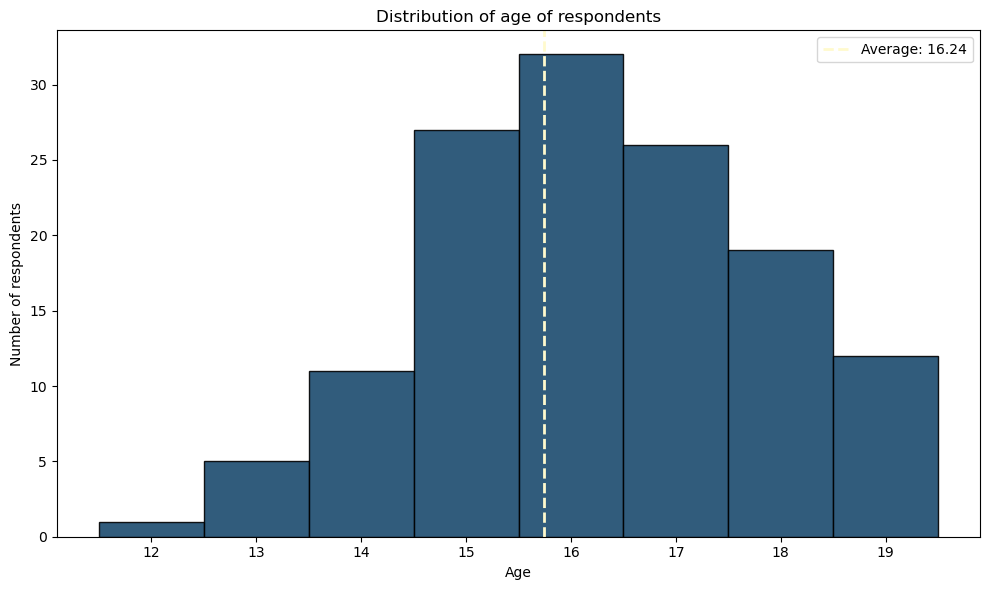

In [12]:
### Age of respondents histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(pre_data['Vek'], bins=range(12, 21), edgecolor='black', alpha=0.9, color='#1a4a6e')
plt.axvline(x=avg_age, color='#fffacd', linestyle='--', linewidth=2, label=f'Average: {avg_age:.2f}')
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title('Distribution of age of respondents')
plt.legend()

# Center the x-tick labels in the middle of each bar
plt.xticks([x + 0.5 for x in range(12, 20)], range(12, 20))

plt.tight_layout()
plt.show()

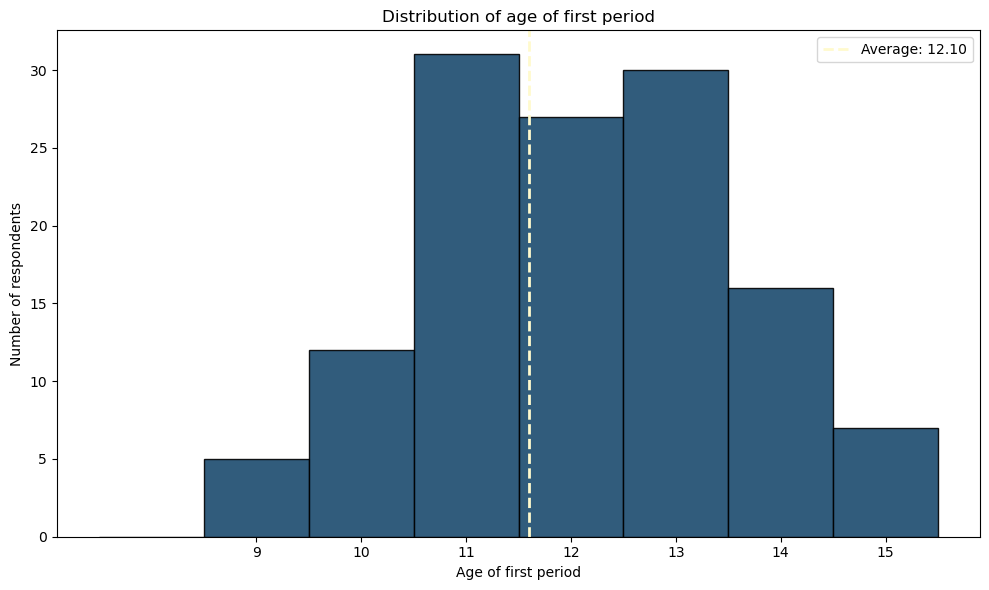

In [13]:
### Age of first period histogram
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(pre_data['Vek prvej menštruácie'], bins=range(8, 17), edgecolor='black', alpha=0.9, color='#1a4a6e')
plt.axvline(x=avg_first_period_age, color='#fffacd', linestyle='--', linewidth=2, label=f'Average: {avg_first_period_age:.2f}')
plt.xlabel('Age of first period')
plt.ylabel('Number of respondents')
plt.title('Distribution of age of first period')
plt.legend()

# Center the x-tick labels in the middle of each bar
plt.xticks([x + 0.5 for x in range(9, 16)], range(9, 16))

plt.tight_layout()
plt.show()

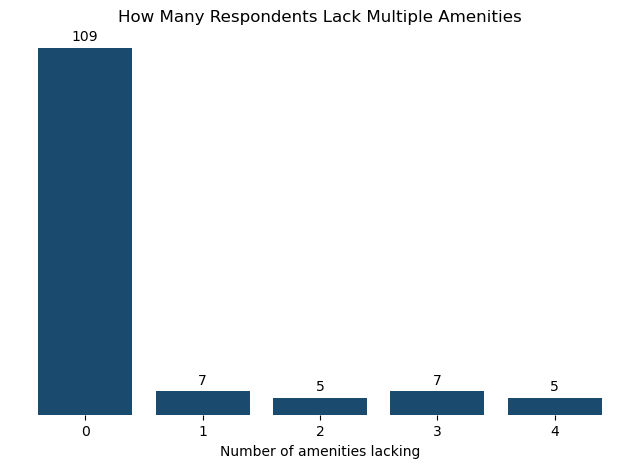

In [14]:
### Access to amenities analysis
access_cols = ['Prístup k teplej vode', 'Prístup k sprche alebo vani',
                'Prístup k splachovaciemu WC', 'Prístup ku teplu alebo kúreniu']

pre_data['Lack_count'] = pre_data[access_cols].apply(lambda row: (row == 'Nie').sum(), axis=1)
lack_counts = pre_data['Lack_count'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(lack_counts.index, lack_counts.values, color='#1a4a6e')
plt.bar_label(bars, padding=3)
plt.xlabel('Number of amenities lacking')
plt.ylabel('Number of respondents')
plt.title('How Many Respondents Lack Multiple Amenities')
plt.xticks([0, 1, 2, 3, 4])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().yaxis.set_visible(False)
plt.show()

In [15]:
pre_data['Lack_pattern'] = pre_data[access_cols].apply(
    lambda row: ', '.join([col.replace('Prístup k ', '').replace('Prístup ku ', '')
                            for col, val in zip(access_cols, row) if val == 'Nie']) or 'None',
    axis=1
)

# Count patterns
pattern_counts = pre_data['Lack_pattern'].value_counts()
print(pattern_counts)

Lack_pattern
None                                                                      109
teplej vode, sprche alebo vani, splachovaciemu WC                           7
teplu alebo kúreniu                                                         5
teplej vode, sprche alebo vani, splachovaciemu WC, teplu alebo kúreniu      5
sprche alebo vani, teplu alebo kúreniu                                      2
teplej vode, splachovaciemu WC                                              1
sprche alebo vani                                                           1
teplej vode                                                                 1
teplej vode, teplu alebo kúreniu                                            1
sprche alebo vani, splachovaciemu WC                                        1
Name: count, dtype: int64


In [16]:
full_access = (pre_data['Lack_count'] == 0).sum()
lacking_any = (pre_data['Lack_count'] > 0).sum()

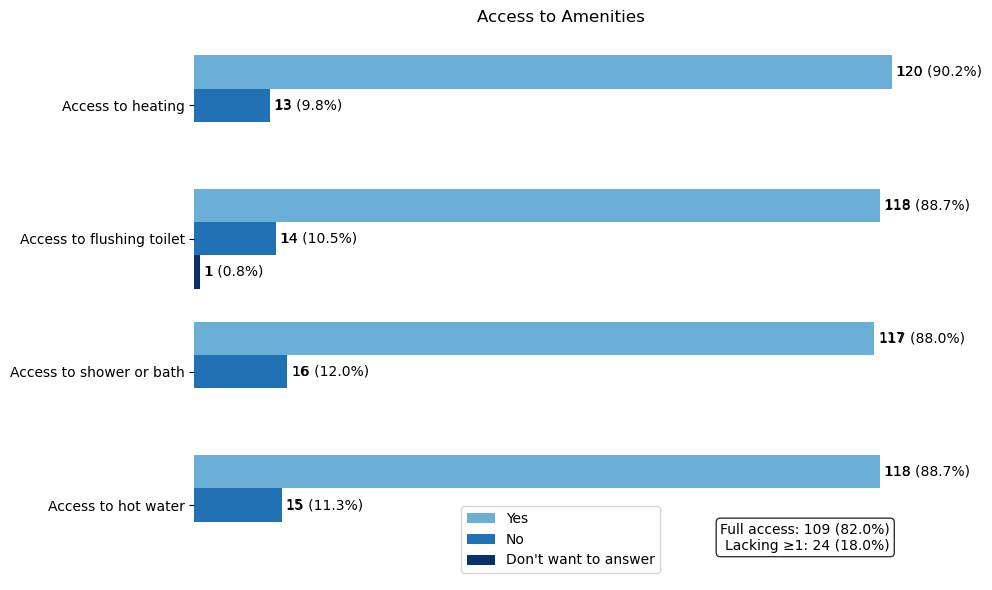

In [17]:
columns = {
    'Prístup k teplej vode': 'Access to hot water',
    'Prístup k sprche alebo vani': 'Access to shower or bath',
    'Prístup k splachovaciemu WC': 'Access to flushing toilet',
    'Prístup ku teplu alebo kúreniu': 'Access to heating'
}

# Answer translations
answer_map = {
    'Áno': 'Yes',
    'Nie': 'No',
    'Nechcem odpovedať': "Don't want to answer"
}

# Count answers for each column
data = {}
for sk_col, en_col in columns.items():
    counts = pre_data[sk_col].map(answer_map).value_counts()
    data[en_col] = counts

df_plot = pd.DataFrame(data).T
df_plot = df_plot[['Yes', 'No', "Don't want to answer"]] 
df_plot = df_plot.fillna(0)


# Plot
fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(df_plot))
height = 0.25

# Create bars with color scheme
bars1 = ax.barh(y + height, df_plot['Yes'], height, label='Yes', color='#6baed6')
bars2 = ax.barh(y, df_plot['No'], height, label='No', color='#2171b5')
bars3 = ax.barh(y - height, df_plot["Don't want to answer"], height, label="Don't want to answer", color='#08306b')

ax.bar_label(bars1, padding=3, labels=[f'{v:.0f}' if v > 0 else '' for v in df_plot['Yes']])
ax.bar_label(bars2, padding=3, labels=[f'{v:.0f}' if v > 0 else '' for v in df_plot['No']])
ax.bar_label(bars3, padding=3, labels=[f'{v:.0f}' if v > 0 else '' for v in df_plot["Don't want to answer"]])
total = len(pre_data)
ax.bar_label(bars1, padding=3, labels=[f'{v:.0f} ({v/total*100:.1f}%)' if v > 0 else '' for v in df_plot['Yes']])
ax.bar_label(bars2, padding=3, labels=[f'{v:.0f} ({v/total*100:.1f}%)' if v > 0 else '' for v in df_plot['No']])
ax.bar_label(bars3, padding=3, labels=[f'{v:.0f} ({v/total*100:.1f}%)' if v > 0 else '' for v in df_plot["Don't want to answer"]])
ax.text(0.95, 0.05, f'Full access: {full_access} ({full_access/total*100:.1f}%)\nLacking ≥1: {lacking_any} ({lacking_any/total*100:.1f}%)',
          transform=ax.transAxes, ha='right', va='bottom', fontsize=10,
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.xaxis.set_visible(False)
for spine in ax.spines.values():
      spine.set_visible(False)
      
ax.set_xlabel('Number of respondents')
ax.set_title('Access to Amenities')
ax.set_yticks(y)
ax.set_yticklabels(df_plot.index)
ax.legend()

plt.tight_layout()
plt.show()

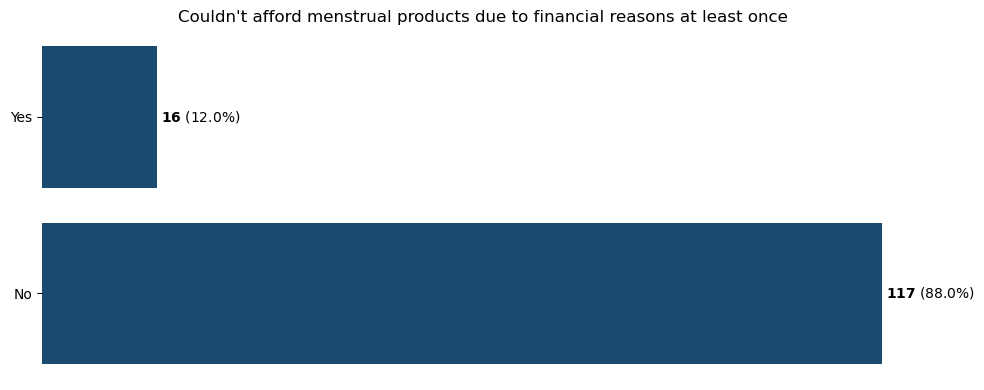

In [18]:
## How many couldn't afford menstrual products?

# Get counts with English labels
afford_counts = pre_data['Stalo sa vám, že ste si kvôli finančným dôvodom nemohli dovoliť kúpiť menštruačné pomôcky?'].map(answer_map).value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.barh(afford_counts.index, afford_counts.values, color='#1a4a6e')

# Add numbers with percentages
total = len(pre_data)
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{v}}}$ ({v/total*100:.1f}%)' for v in afford_counts.values])

# Remove x-axis
ax.xaxis.set_visible(False)

# Remove graph outline
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Couldn't afford menstrual products due to financial reasons at least once")

plt.tight_layout()
plt.show()

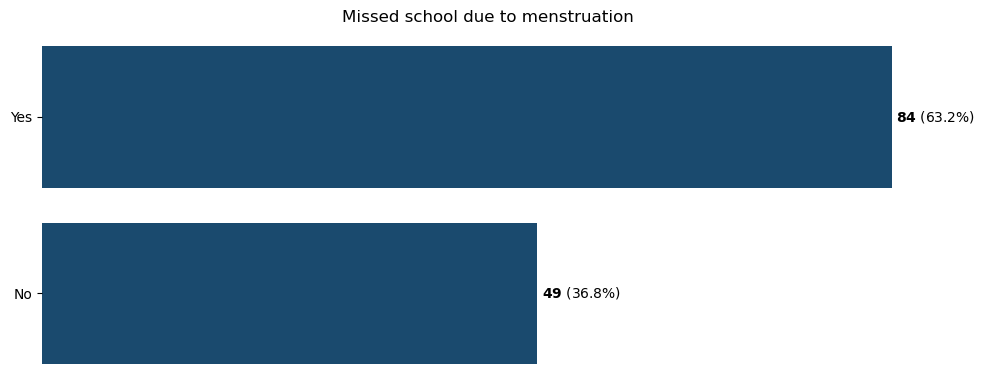

In [19]:
# Number of respondents who missed school due to having their period

# Get counts with English labels
missed_school_counts = pre_data['Vynechali ste niekedy školu kvôli menštruácii?'].map(answer_map).value_counts()
order = ["Don't want to answer", 'No', 'Yes']
missed_school_counts = missed_school_counts.reindex([x for x in order if x in missed_school_counts.index])

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.barh(missed_school_counts.index, missed_school_counts.values, color='#1a4a6e')

# Add numbers with percentages (number in bold)
total = len(pre_data)
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{v}}}$ ({v/total*100:.1f}%)' for v in missed_school_counts.values])

# Remove x-axis
ax.xaxis.set_visible(False)

# Remove graph outline
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Missed school due to menstruation')

plt.tight_layout()
plt.show()

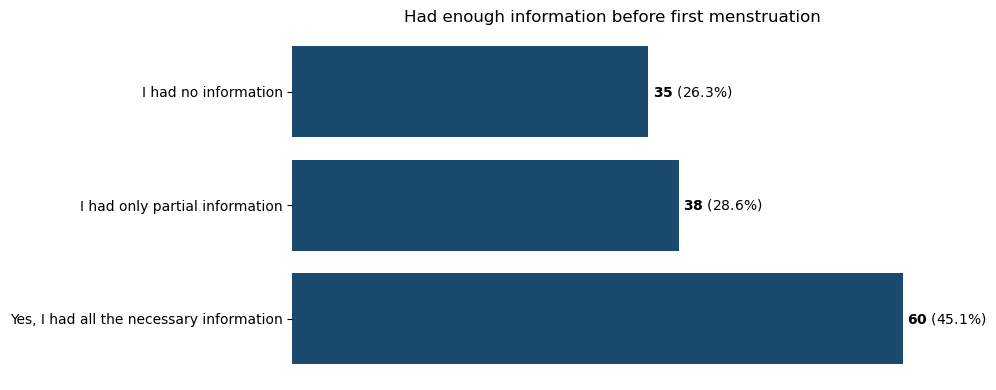

In [20]:
# Had enough information before first menstruation
info_prep_map = {
    'Áno, mala som všetky potrebné informácie': 'Yes, I had all the necessary information',
    'Mala som len čiastočné informácie': 'I had only partial information',
    'Nemala som žiadne informácie': 'I had no information'
}

# Get counts with English labels
info_prep_counts = pre_data['Mali ste pred prvou menštruáciou dostatok informácií o tom, čo menštruácia znamená a ako sa na ňu pripraviť?'].map(info_prep_map).value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.barh(info_prep_counts.index, info_prep_counts.values, color='#1a4a6e')

# Add numbers with percentages (number in bold)
total = len(pre_data)
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{v}}}$ ({v/total*100:.1f}%)' for v in info_prep_counts.values])

# Remove x-axis
ax.xaxis.set_visible(False)

# Remove graph outline
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Had enough information before first menstruation')

plt.tight_layout()
plt.show()

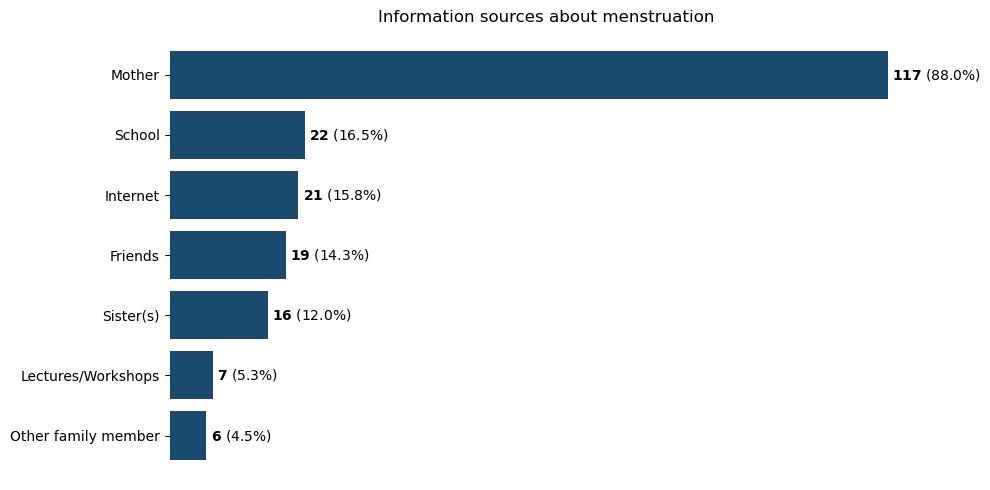

In [21]:
# Information sources about menstruation
info_cols = {
    'Informácie o menštruácií získané od matky': 'Mother',
    'Informácie o menštruácií získané zo školy': 'School',
    'Informácie o menštruácií získané z internetu': 'Internet',
    'Informácie o menštruácií získané od kamarátov': 'Friends',
    'Informácie o menštruácií získané od sestry/sestier': 'Sister(s)',
    'Informácie o menštruácií získané od iného rodinného príslušníka': 'Other family member',
    'Informácie o menštruácií získané z prednášok/workshopov': 'Lectures/Workshops'
}

# Get sums and rename
info_sums = pre_data[list(info_cols.keys())].sum().sort_values(ascending=True)
info_sums.index = [info_cols[col] for col in info_sums.index]

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(info_sums.index, info_sums.values, color='#1a4a6e')

# Add numbers with percentages (number in bold)
total = len(pre_data)
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{int(v)}}}$ ({v/total*100:.1f}%)' for v in info_sums.values])

# Remove x-axis
ax.xaxis.set_visible(False)

# Remove graph outline
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Information sources about menstruation')

plt.tight_layout()
plt.show()

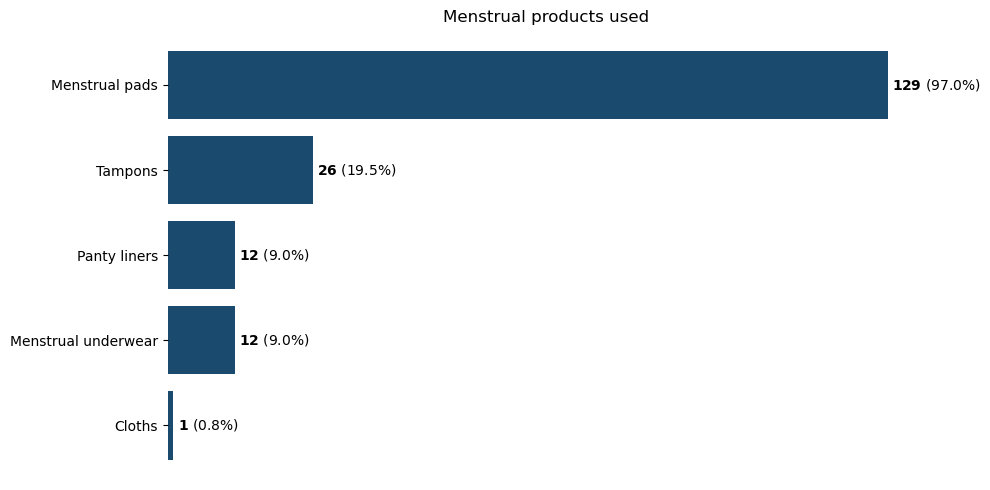

In [22]:
# Used products analysis
product_cols = {
    'Používané potreby: Menštruačné vložky': 'Menstrual pads',
    'Používané porteby: Tampóny': 'Tampons',
    'Používané potreby: Menštruačné nohavičky': 'Menstrual underwear',
    'Používané porteby: Intímky': 'Panty liners',
    'Používané potreby: Handry': 'Cloths'
}

# Get sums and rename
product_sums = pre_data[list(product_cols.keys())].sum().sort_values(ascending=True)
product_sums.index = [product_cols[col] for col in product_sums.index]

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(product_sums.index, product_sums.values, color='#1a4a6e')

# Add numbers with percentages (number in bold)
total = len(pre_data)
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{int(v)}}}$ ({v/total*100:.1f}%)' for v in product_sums.values])

# Remove x-axis
ax.xaxis.set_visible(False)

# Remove graph outline
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Menstrual products used')

plt.tight_layout()
plt.show()

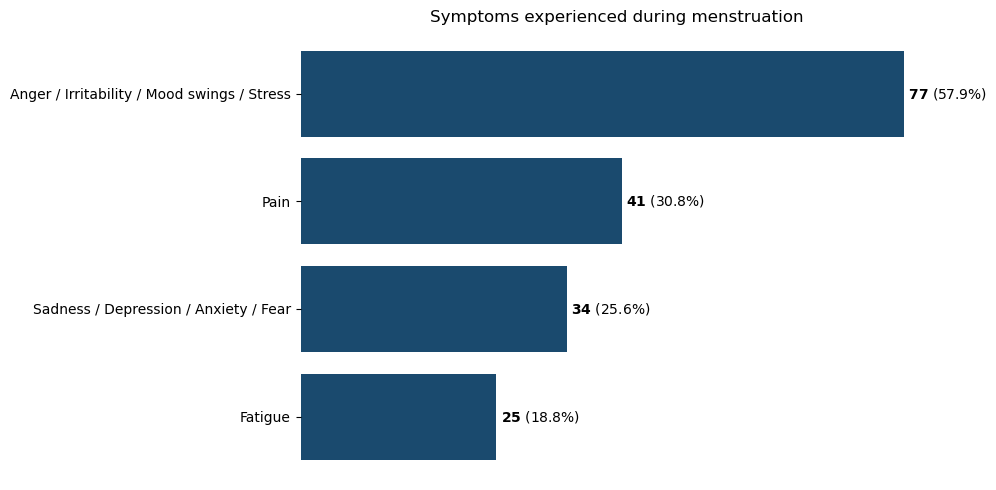

In [23]:
# Analysis of symptoms during menstruation
symptom_cols = {
    'Pocity: bolesť': 'Pain',
    'Pocity: únava': 'Fatigue',
    'Pocity: hnev / nervozita / náladovosť / stres': 'Anger / Irritability / Mood swings / Stress',
    'Pocity: smútok / depresia / úzkosť / strach': 'Sadness / Depression / Anxiety / Fear'
}

# Get sums and rename
symptom_sums = pre_data[list(symptom_cols.keys())].sum().sort_values(ascending=True)
symptom_sums.index = [symptom_cols[col] for col in symptom_sums.index]

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(symptom_sums.index, symptom_sums.values, color='#1a4a6e')

# Add numbers with percentages (number in bold)
total = len(pre_data)
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{int(v)}}}$ ({v/total*100:.1f}%)' for v in symptom_sums.values])

# Remove x-axis
ax.xaxis.set_visible(False)

# Remove graph outline
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Symptoms experienced during menstruation')

plt.tight_layout()
plt.show()

## Cross analysis

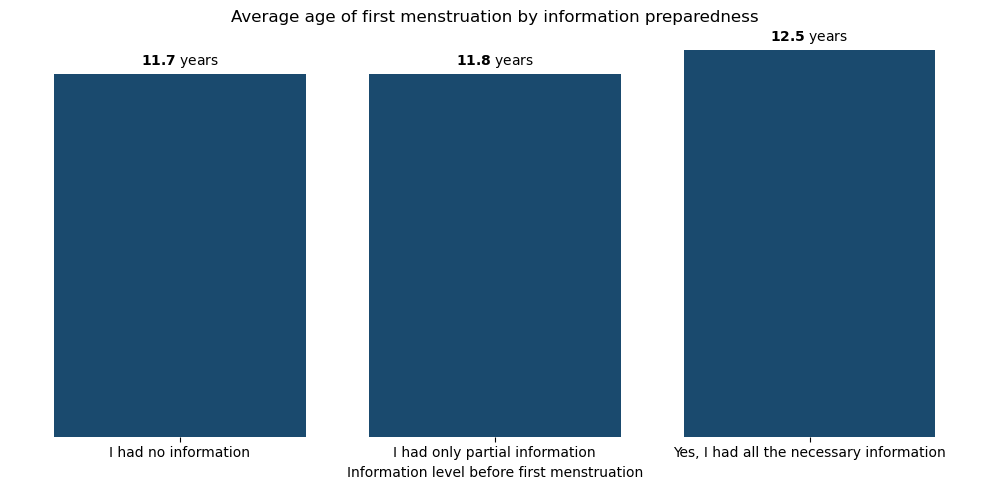

In [26]:
# Hypothesis: People who started menstruating earlier are more likely to be missing information before their first period
df_analysis = pre_data[['Mali ste pred prvou menštruáciou dostatok informácií o tom, čo menštruácia znamená a ako sa na ňu pripraviť?', 'Vek prvej menštruácie']].copy()
df_analysis.columns = ['Information level', 'Age of first period']
df_analysis['Information level'] = df_analysis['Information level'].map(info_prep_map)

mean_ages = df_analysis.groupby('Information level')['Age of first period'].mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(mean_ages.index, mean_ages.values, color='#1a4a6e')

# Add values on bars
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{v:.1f}}}$ years' for v in mean_ages.values])

# Remove y-axis
ax.yaxis.set_visible(False)

# Remove graph outline
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Average age of first menstruation by information preparedness')
ax.set_xlabel('Information level before first menstruation')

plt.tight_layout()
plt.show()

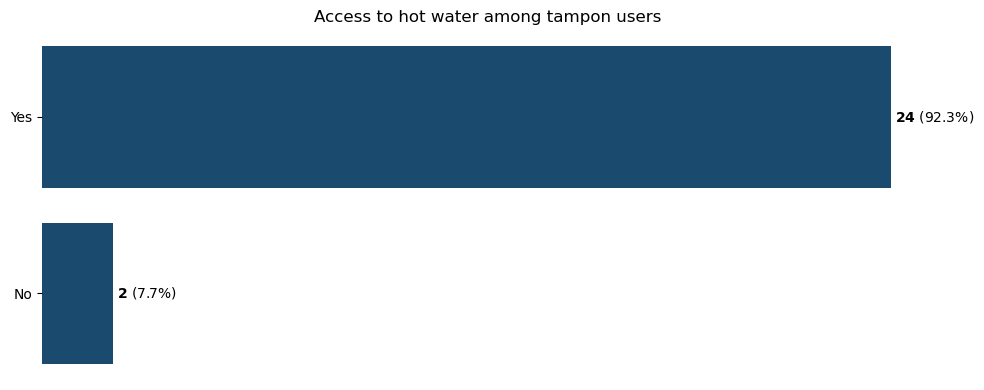

In [30]:
## Number of respondents who use tampons but have limited access to hot water
tampon_users = pre_data[pre_data['Používané porteby: Tampóny'] == 1]

# Count hot water access among tampon users
hot_water_counts = tampon_users['Prístup k teplej vode'].map(answer_map).value_counts()

# Reorder
order = ["Don't want to answer", 'No', 'Yes']
hot_water_counts = hot_water_counts.reindex([x for x in order if x in hot_water_counts.index])

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.barh(hot_water_counts.index, hot_water_counts.values, color='#1a4a6e')

# Add numbers with percentages (number in bold)
total_tampon = len(tampon_users)
ax.bar_label(bars, padding=3, labels=[f'$\\mathbf{{{v}}}$ ({v/total_tampon*100:.1f}%)' for v in hot_water_counts.values])

ax.xaxis.set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title(f'Access to hot water among tampon users')

plt.tight_layout()
plt.show()